<a href="https://colab.research.google.com/github/dheerajkumar5/Predicting-Placement-Outcomes/blob/main/Logistic_Regression_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Placement.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [5]:
df = df[['cgpa','iq','placement']]

In [6]:
df.shape

(100, 3)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


<ipython-input-10-53d6a8fd3b00>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['iq'])


<Axes: xlabel='iq', ylabel='Density'>

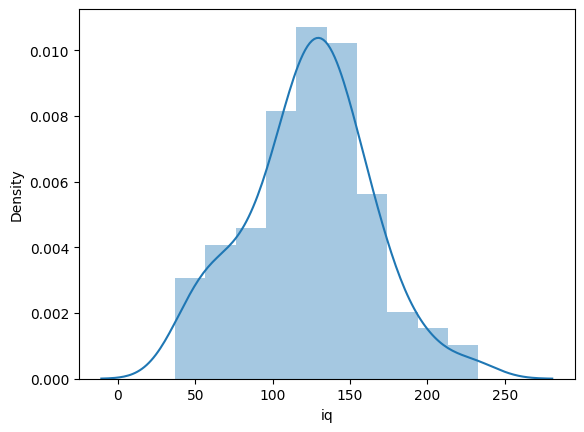

In [10]:
sns.distplot(df['iq'])

<ipython-input-11-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

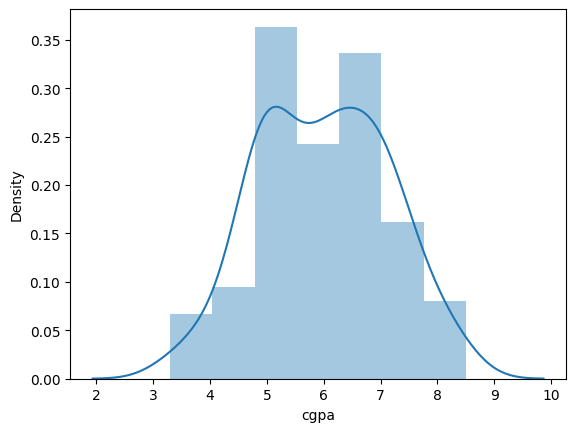

In [11]:
sns.distplot(df['cgpa'])

In [12]:
df['placement'].skew()

np.float64(0.0)

In [13]:
corr = df[['cgpa','iq', 'placement']].corr()

<Axes: >

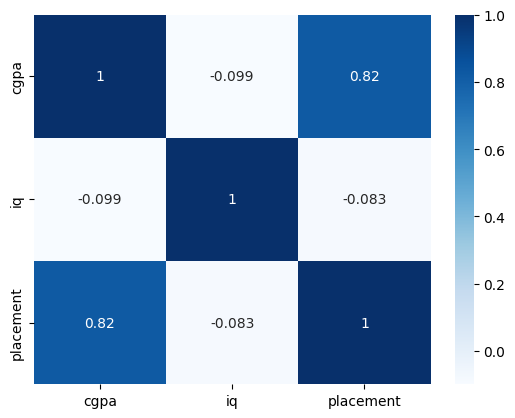

In [ ]:
sns.heatmap(corr, annot = True, cmap = 'Blues')

<Axes: xlabel='cgpa', ylabel='iq'>

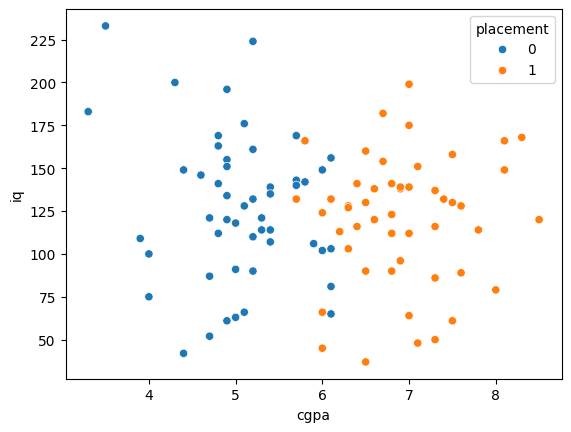

In [14]:
sns.scatterplot(x = 'cgpa', y = 'iq', data = df, hue = 'placement')

In [15]:
x = df.drop(columns = ['placement'])
y = df['placement']

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [17]:
scaler = StandardScaler()

In [18]:
xtrain = scaler.fit_transform(xtrain)

In [19]:
xtest = scaler.fit_transform(xtest)

In [20]:
model = LogisticRegression()

In [21]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [22]:
pred = model.predict(xtest)

In [23]:
pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [24]:
score = accuracy_score(ytest, pred)
score

0.85

In [25]:
cls = classification_report(ytest, pred)
cls

'              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86        10\n           1       0.89      0.80      0.84        10\n\n    accuracy                           0.85        20\n   macro avg       0.85      0.85      0.85        20\nweighted avg       0.85      0.85      0.85        20\n'

In [26]:
fpr, tpr, _ = roc_curve(ytest, pred)
curve = auc(fpr, tpr)

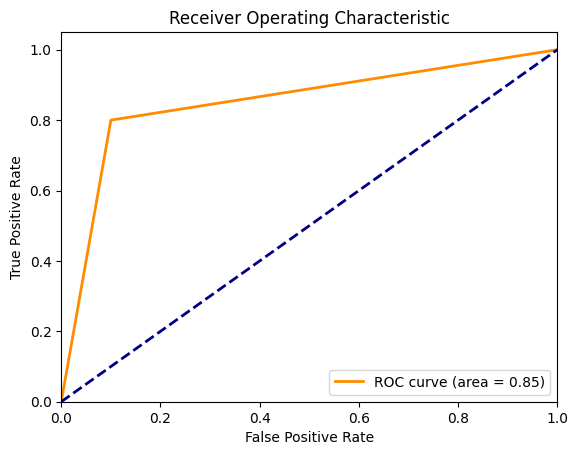

In [27]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

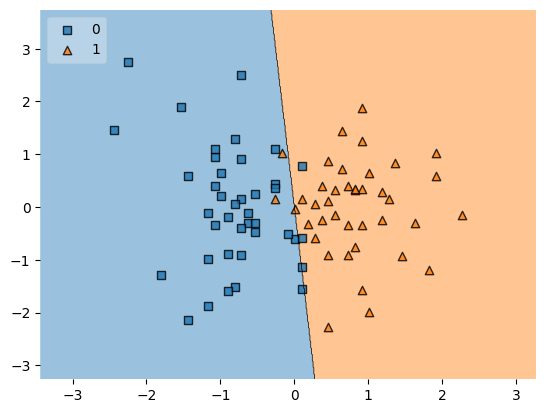

In [29]:
plot_decision_regions(xtrain, ytrain.values, clf = model, legend = 2)